# Lista 6
## Procesy Poissona
### Magdalena Ryś 276004

In [97]:
import numpy as np
import matplotlib.pyplot as plt

#### Zadanie 1
Zaimplementuj generowanie próby trajektorii procesu Poissona na odcinku $[0, T]$ opierając się na znajomości rozkładu jego czasów oczekiwania.
1. Narysuj jego trajektorie.
2. Napisz algorytm obliczający wartości Nt, zweryfikuj, czy ma poprawny rozkład.

In [139]:
def method1(T, lambada):
    I = 0
    t = 0
    s = []

    while True:
        U = np.random.uniform(0,1)
        t = t - (1/lambada) * np.log(U)
        if t > T:
            break
        I = I + 1
        s.append(t)

    return s

def method2(T, lambada):
    n = np.random.poisson(lambada*T)

    assert n != 0, "Niespełniony warunek n != 0"

    Us = np.random.uniform(0, T, n)
    return np.sort(Us)

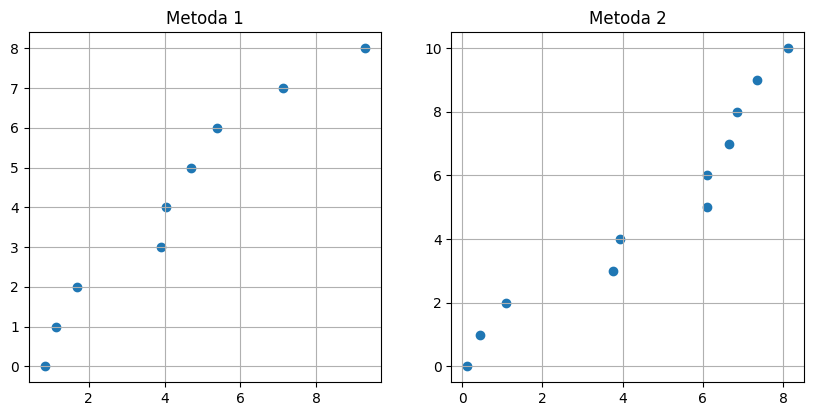

In [122]:
s1 = method1(10, 1)
s2 = method2(10, 1)
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.scatter(s1, range(len(s1)))
plt.title("Metoda 1")
plt.grid(True)

plt.subplot(2, 2, 2)
plt.scatter(s2, range(len(s2)))
plt.title("Metoda 2")
plt.grid(True)

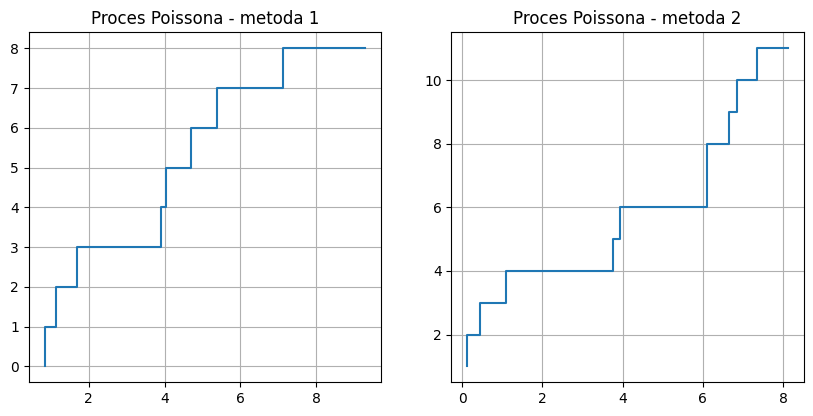

[0.8333861017432823, 1.1309284826610646, 1.6891373002178638, 3.903752345753831, 4.024343559624907, 4.688265573629934, 5.384151034401676, 7.124074733235393, 9.283242999680825]


In [140]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.step(s1, range(len(s1)))
plt.title('Proces Poissona - metoda 1')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.step(s2, np.cumsum(s2>0))
plt.title('Proces Poissona - metoda 2')
plt.grid(True)

plt.show()

print(s1)